In [1]:
# did not sync the repo correctly; do this in order to avoid conficts
import matplotlib.pyplot as plt
import numpy as np

In [47]:
def potential(f1, l, pi, r):
    a, b = 1/4, -1/3
    c = (r+pi)/(2*l)
    d = -pi/l
    return a*f1**4 + b*f1**3 + c*f1**2 + d*f1

def deriv_potential(f1, l, pi, r): # minus this is the ODE
    a, b = 1, -1
    c = (r+pi)/l
    d = -pi/l
    return a*f1**3 + b*f1**2 + c*f1 + d

def sols_deriv_potential_pi0(l, r): # a part from 0
    sqrtVal = np.sqrt(1 - 4*r/l)
    return (1+sqrtVal)/2, (1-sqrtVal)/2

def sols_deriv_potential(l, pi, r): 
    a, b = 1, -1
    c = (r + pi)/l
    d = -pi/l
    # step 1: delta0 and elta 1
    delta0 = b**2 - 3*a*c
    delta1 = 2*b**3 - 9*a*b*c + 27*a**2*d
    # step 2: computation of C:
    if delta0 == 0.0 and delta1 != 0.0:
        C = delta1**(1/3) # cubic_root[(delta1 + sqrt(delta1**2+0))/2]
    elif delta0 == 0.0 and delta1 == 0.0:
        C = 1.0 # so in the next step delta0/C yields 0.0 instead of NaN (0.0/0.0)
    else:
        radicand0 = delta1**2 - 4*delta0**3
        if radicand0 < 0:
            root0 = complex(0,np.sqrt(-1*radicand0))
        else:
            root0 = complex(np.sqrt(radicand0),0)
        radicand1 = (delta1 + root0)/2
        C = radicand1**(1/3)
    # 3: Final solution
    ksi = complex(-1, np.sqrt(3))/2
    f_roots, f_roots_Re = [], []
    for k in range(3):
        f0_root = -1/(3*a)*(b + ksi**k*C + delta0/(C*ksi**k))
        f_roots.append(f0_root), f_roots_Re.append(f0_root.real)
    return f_roots_Re, f_roots

# pi = 0

In [ ]:
l, pi = 1, 0
f1s = np.arange(0.0, 1.01, 0.01)

fig, ax = plt.subplots(constrained_layout=True)
ax.axhline(0.0, ls='-.', lw=0.8, color='xkcd:gray')
# ax.axvline(1/3, ls='-.', lw=0.8, color='xkcd:gray')
# ax.axvline(2/3, ls='-.', lw=0.8, color='xkcd:gray')

rs, label_rs = [1/3, 1/4, 2/9, 1/5], ['1/3', '1/4', '2/9', '1/5']
for r,label in zip(rs, label_rs):
    pot = potential(f1s, l, pi, r)
    ln, = ax.plot(f1s, pot, label=label)
    if r<=1/4:
        sols_f1 = np.array(sols_deriv_potential_pi0(l, r))
        ax.scatter(sols_f1, potential(sols_f1, l, pi, r), marker='o', edgecolors=ln.get_color(), color='xkcd:white')

ax.legend(title=r'$ r/ \lambda, \; \pi = 0 $', frameon=False)
ax.set_ylim(-0.01, 0.02)
ax.set(xlabel=r'$f_1$', ylabel=r'$\psi$')
fig.savefig('potential_pi0_var_rl.png')

# pi != 0

In [109]:
def poly3_magic_pi(pi, l, r):
    a = 4
    b = 4*(3*r + 2*l)
    c = 4*(3*r**2 + l**2 - 5*l*r)
    d = 4*r**3 - l*r**2
    return a*pi**3 + b*pi**2 + c*pi + d # tonteria, aixo es el que has calculat abans delta1**2 - delta0**3

def poly3_magic_pi_sols(l, r):
    a = 4
    b = 4*(3*r + 2*l)
    c = 4*(3*r**2 + l**2 - 5*l*r)
    d = 4*r**3 - l*r**2
    # step 1: delta0 and elta 1
    delta0 = b**2 - 3*a*c
    delta1 = 2*b**3 - 9*a*b*c + 27*a**2*d
    # step 2: computation of C:
    if delta0 == 0.0 and delta1 != 0.0:
        C = delta1**(1/3) # cubic_root[(delta1 + sqrt(delta1**2+0))/2]
    elif delta0 == 0.0 and delta1 == 0.0:
        C = 1.0 # so in the next step delta0/C yields 0.0 instead of NaN (0.0/0.0)
    else:
        radicand0 = delta1**2 - 4*delta0**3
        if radicand0 < 0:
            root0 = complex(0,np.sqrt(-1*radicand0))
        else:
            root0 = complex(np.sqrt(radicand0),0)
        radicand1 = (delta1 + root0)/2
        C = radicand1**(1/3)
    # 3: Final solution
    ksi = complex(-1, np.sqrt(3))/2
    roots, roots_Re = [], []
    for k in range(3):
        f0_root = -1/(3*a)*(b + ksi**k*C + delta0/(C*ksi**k))
        roots.append(f0_root), roots_Re.append(f0_root.real)
    return roots_Re, roots

[(-0-1.850371707708594e-17j), (0.5894427190999916-3.700743415417188e-17j), (0.4105572809000083+7.401486830834377e-17j)]
[(0.04859980692591499-1.850371707708594e-17j), (0.618977615841469-0j), (0.3324225772326158-0j)]
[(0.14461394903792849-0j), (0.6389324129699834+4.625929269271485e-18j), (0.216453637992088-3.700743415417188e-17j)]
[(0.17279450887198877+0.12643104502042948j), (0.6544109822560225+7.714300604847435e-18j), (0.17279450887198877-0.12643104502042954j)]
[(0.1664044804300131+0.179617350112737j), (0.6671910391399738+3.0349108143936566e-17j), (0.16640448043001313-0.17961735011273708j)]


[Text(0.5, 0, '$f_1$'), Text(0, 0.5, '$\\psi$')]

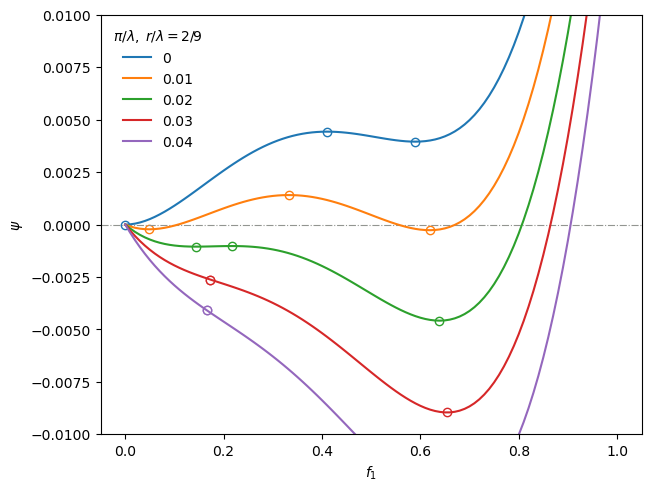

In [72]:
l, r = 1, 2/9

r = 0.242

f1s = np.arange(0.0, 1.01, 0.01)

fig, ax = plt.subplots(constrained_layout=True)
ax.axhline(0.0, ls='-.', lw=0.8, color='xkcd:gray')
# ax.axvline(1/3, ls='-.', lw=0.8, color='xkcd:gray')
# ax.axvline(2/3, ls='-.', lw=0.8, color='xkcd:gray')
for pi in [0, 0.01, 0.02, 0.03, 0.04]: # 0.1, 1
    pot = potential(f1s, l, pi, r)
    ln, = ax.plot(f1s, pot, label=pi)
    sols_f1_Re, sols_f1_C = sols_deriv_potential(l, pi, r)
    sols_f1_Re = np.array(sols_f1_Re)
    print(sols_f1_C)
    ax.scatter(sols_f1_Re, potential(sols_f1_Re, l, pi, r), marker='o', edgecolors=ln.get_color(), color='xkcd:white')

ax.legend(title=f'$\pi / \lambda, \; r/\lambda = 2/9$', frameon=False)
ax.set_ylim(-0.01, 0.01)
# ax.set_yscale('symlog')
ax.set(xlabel=r'$f_1$', ylabel=r'$\psi$')
# fig.savefig('potential_var_pil_rl_29.png')

In [67]:
# analyze the internal parts of the 3rd deg poly in order to see when it becomes complex;
def poly3_Deltas(l,r,pi):
    a, b = 1, -1
    c = (r + pi)/l
    d = -pi/l
    delta0 = b**2 - 3*a*c
    delta1 = 2*b**3 - 9*a*b*c + 27*a**2*d
    return delta0, delta1

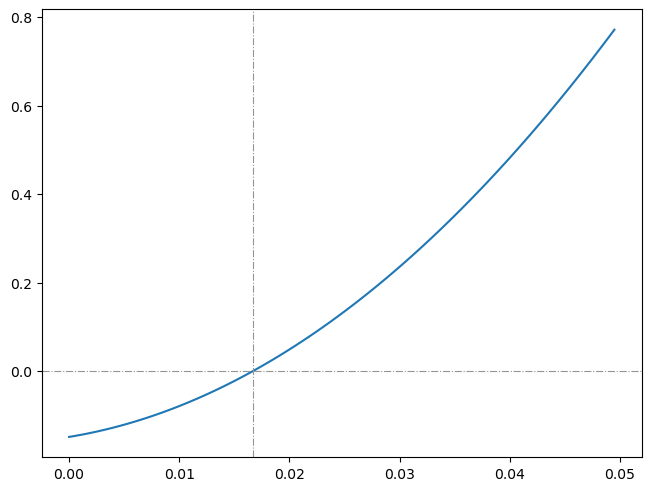

In [114]:
# model params: pi will be the one changing
l = 1
r = 0.242 # things happen below but close to pi = 0.02
r = 0.222


pis = np.arange(0.0, 0.05, 0.0005)
magic_pi = poly3_magic_pi_sols(l, r)[0][1]

fig, ax = plt.subplots(constrained_layout=True)
ax.axhline(0.0, ls='-.', lw=0.8, color='xkcd:gray')
delta0, delta1 = poly3_Deltas(l, r, pis)
radicand = delta1**2 - 4*delta0**3
ax.plot(pis, radicand)
ax.axvline(magic_pi, color='xkcd:gray', lw=0.8, ls='-.')

In [115]:
real_parts, im_parts = [[],[],[]], [[],[],[]]
for pi in pis:
    sols_f1_Re, sols_f1_C = sols_deriv_potential(l, pi, r)
    for i in range(3):
        real_parts[i].append(sols_f1_Re[i]), im_parts[i].append(sols_f1_C[i].imag)

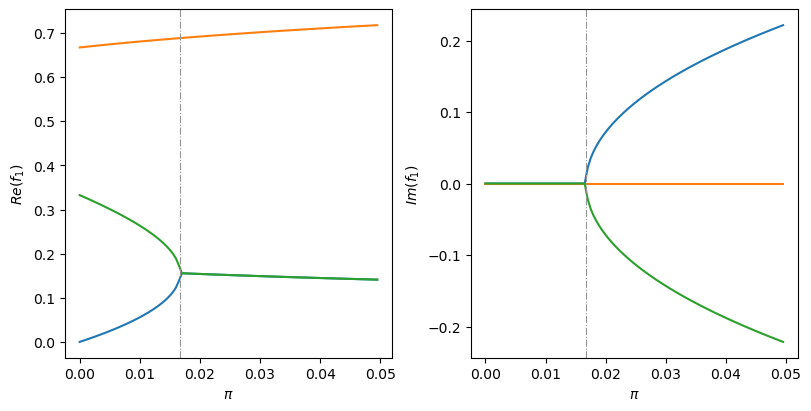

In [116]:
fig, ax = plt.subplots(1, 2, figsize=(8,4), constrained_layout=True)

ax[0].set_ylabel('$Re (f_1)$')
ax[1].set_ylabel('$Im (f_1)$')
for i in range(2):
    ax[i].set_xlabel('$\pi$')

for i in range(3):
    ax[0].plot(pis, real_parts[i])
    ax[1].plot(pis, im_parts[i])

# ax[0].axvline(0.02, color='xkcd:gray', lw=0.8, ls='-.')
# ax[1].axvline(0.02, color='xkcd:gray', lw=0.8, ls='-.')



ax[0].axvline(magic_pi, color='xkcd:gray', lw=0.8, ls='-.')
ax[1].axvline(magic_pi, color='xkcd:gray', lw=0.8, ls='-.')


In [105]:
poly3_magic_pi_sols(1, 0.242)

([-2.7384657081940675, 0.020721955255739312, -0.008256247061671829],
 [(-2.7384657081940675+2.3129646346357427e-18j),
  (0.020721955255739312+2.9605947323337506e-16j),
  (-0.008256247061671829-2.9605947323337506e-16j)])

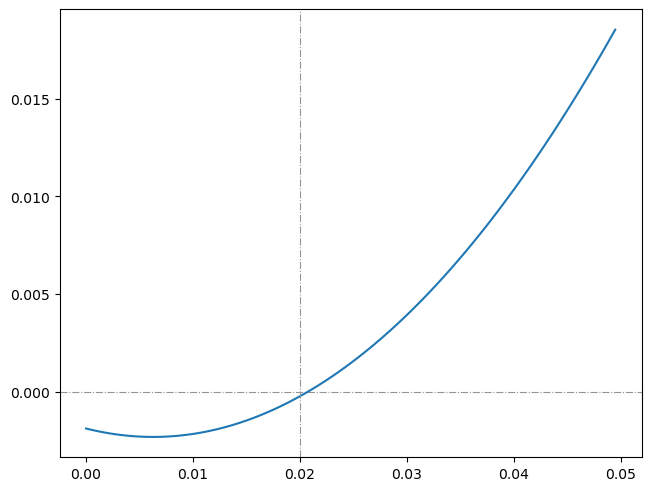

In [108]:
pis = np.arange(0.0, 0.05, 0.0005)

fig, ax = plt.subplots(constrained_layout=True)
ax.axhline(0.0, ls='-.', lw=0.8, color='xkcd:gray')
poly_magic_pi = poly3_magic_pi(pis, l, r)
ax.plot(pis, poly_magic_pi)
ax.axvline(0.02, color='xkcd:gray', lw=0.8, ls='-.')